# Exploratory data analysis and Feature Engineering

## Environment Setup

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Data Prep and Exploration

The dataset is from the U.S. Small Business Administration (SBA)

The U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market (SBA Overview and History, US Small Business Administration (2015)). Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment.

There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. However, there have also been stories of small businesses and/or start-ups that have defaulted on their SBA-guaranteed loans.

1. Load the data and do your initial preparation. How many observations and variables do you have?

In [3]:
SBA = pd.read_csv("SBA/SBAnational.csv", low_memory=False)
SBA.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [3]:
SBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [6]:
predictable = SBA[SBA["MIS_Status"].notnull()]
approve_loan = pd.get_dummies(predictable["MIS_Status"], drop_first=True).rename(columns={"P I F": "Approve"})
predictable = pd.concat([predictable,approve_loan], axis=1)

In [10]:
OneHotEncoder().fit_transform(predictable[["NAICS"]]).toarray().shape

(897167, 1312)

With the given dataset, we have around 899164 rows of SBA Loan historical data and 27 feature columns.

1. LoanNr_ChkDgt : Identifier
2. Name : Borrower Name
3. City : Borrower City
4. State : Borrower State
5. Zip : Borrower Zip Code
6. Bank : Bank Name
7. BankState : Bank State
8. NAICS : North American industry classification system code.
9. ApprovalDate : Date SBA commitment issued
10. ApprovalFY : Fiscal year of commitment
11. Term : Loan term in months
12. NoEmp : Number of Business Employees
13. NewExist : 1 = Existing business, 2 = New business
14. CreateJob : Number of Jobs Created
15. RetainedJob : Number of jobs retained
16. FranchiseCode : Franchise code, (00000 or 00001) = No franchise
17. UrbanRural : 1 = Urban, 2 = rural, 0 = undefined
18. RevLineCr : Revolving line of credit: Y = Yes, N = No
19. LowDoc : LowDoc Loan Program: Y = Yes, N = No
20. ChgOffDate : The date when a loan is declared to be in default
21. DisbursementDate : Disbursement date
22. DisbursementGross : Amount disbursed
23. BalanceGross : Gross amount outstanding
24. MIS_Status : Loan status charged off = CHGOFF, Paid in full = PIF
25. ChgOffPrinGr : Charged-off amount
26. GrAppv : Gross amount of loan approved by bank
27. SBA_Appv : SBA's guaranteed amount of approved loan

2. Select a 25% sample of the data for use in testing.

In [4]:
train, test = train_test_split(SBA,test_size=.25, random_state=42)

3. Describe the distribution of the outcome variable. What is the majority class?

In [5]:
approve_loan = pd.get_dummies(train["MIS_Status"], drop_first=True).rename(columns={"P I F": "Approve"})
train = pd.concat([train,approve_loan], axis=1)

<AxesSubplot:>

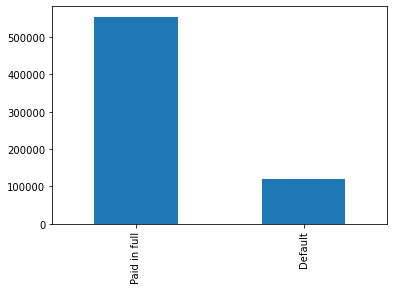

In [6]:
train["Approve"].value_counts().rename({1: "Paid in full", 0: "Default"}).plot.bar()

Paid in full is the Majority class.

4. What is the accuracy, precision, and recall of the majority-class classifier on the test data?

In [7]:
approve_loan = pd.get_dummies(test["MIS_Status"], drop_first=True).rename(columns={"P I F": "Approve"})
test = pd.concat([test,approve_loan], axis=1)

In [8]:
test_y = test["Approve"]
test_d = pd.Series(1, index=test.index)

tn, fp, fn, tp = confusion_matrix(test_y, test_d).ravel()
print(confusion_matrix(test_y, test_d))
print("Accuracy:", (tp+tn)/(tp+tn+fp+fn))
print("Recall:", tp/(tp+fn))
print("Precision:", tp/(tp+fp))

[[     0  39880]
 [     0 184911]]
Accuracy: 0.8225907620856707
Recall: 1.0
Precision: 0.8225907620856707


## Feature Selection

After conducting exploratory data analysis, the next step is to do a feature selection by analyzing the relation between all features and target features.

### Target Feature (Y)
The feature that will be labeled as the target is the MIS_Status feature. Where in this feature explains which borrower cannot repay loans.

### Training Feature (X)

#### 1. Personal & Institution Information Feature

From SBA Data Frame we can make a conclusion that there are seven column that give personal and institution information

* LoanNr_ChkDgt as borrower Identifier
* Name as Borrower Name
* City as Borrower City
* State as Borrower State
* Zip as Borrower Zip Code
* Bank as Bank Name
* BankState as Bank State
* FranchiseCode as FranchiseCode
* UrbanRural as information about business
  
This information is used only to identify the borrower and the Bank. With that reason we not use this feature for future modeling. 

But it might be interesting to know the effect of Urban/Rural business in the loan approval scenario.

<AxesSubplot:xlabel='UrbanRural', ylabel='count'>

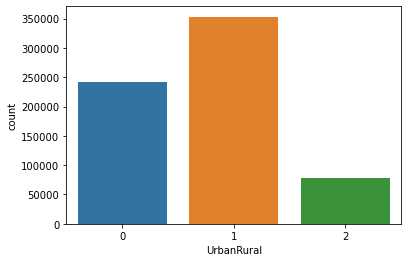

In [9]:
sns.countplot(x="UrbanRural", data=train)

In [10]:
train["UrbanRural"].value_counts()

1    353230
0    242187
2     78956
Name: UrbanRural, dtype: int64

Urban/Rural (1= Urban, 2= Rural, 0 = Undefined) as a lot of values that are undefined. If we are to drop these value, we will loss almost 36% of data.

#### 2. NAICS (North American industry classification system code)

NAICS is a classification system of several types of industries registered in America. The first two digits of NAICS explained the type of business industries.

NAICS itself has the potential for decision making. The type of industry will affect the company's performance in business. So that this feature will be used later in the model.

<AxesSubplot:>

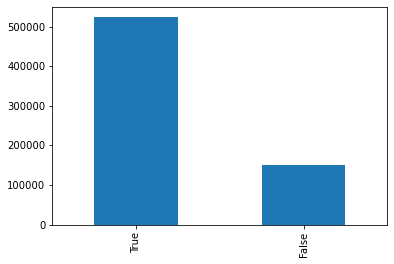

In [11]:
train["NAICS"].map(lambda x: x != 0).value_counts().plot.bar()

The NAICS field is a six digit code field but has around 22.5% of data that has undefined values. 

#### 3. Date and Time Feature

It's dataset contained some feature that explains the date of commitment and disbursement.

* ApprovalDate : Date SBA commitment issued
* ApprovalFY : Fiscal year of commitment
* ChgOffDate : The date when a loan is declared to be in default
* DisbursementDate : Disbursement date


Because the model will be deployed following the operating time of the Bank, this feature is used only for additional information and not for modeling.

One of the risk factor to keep in mind while approving loan might be the economy. Small business loans are affected by the economy in general, and more small business loans tend to default right before and during an economic recession. Thus Disbursement Date along with Loan term can be used to see whether loan were active during great recession.

<AxesSubplot:xlabel='Recession', ylabel='count'>

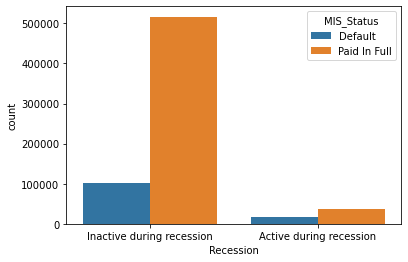

In [12]:
demo = train[["MIS_Status", "DisbursementDate", "Term"]].copy()
demo.dropna(inplace=True)
rec_date = pd.to_datetime(demo["DisbursementDate"]) + pd.to_timedelta(demo["Term"]*30, unit="D")
recession = pd.Series("Inactive during recession", index=demo.index)
recession[(rec_date >= pd.to_datetime("2007-12-01")) & (rec_date <= pd.to_datetime("2009-06-30"))] = "Active during recession"
demo.drop(["DisbursementDate", "Term"], axis=1, inplace=True)
demo["Recession"] = recession
demo["MIS_Status"] = demo["MIS_Status"].replace({"P I F": "Paid In Full", "CHGOFF":"Default"})
sns.countplot(x="Recession", hue="MIS_Status", data=demo)


#### 4. 


The term provides information on how long the loan will take. Concerning the rules of risk management, the longer the duration, the greater the uncertainty that will lead to risk. So this feature will be used as a reference for modeling.

<AxesSubplot:xlabel='Term', ylabel='count'>

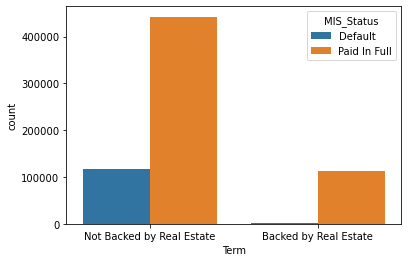

In [13]:
demo = train[["MIS_Status", "Term"]].copy()
demo["MIS_Status"] = demo["MIS_Status"].replace({"P I F": "Paid In Full", "CHGOFF":"Default"})
demo.dropna(inplace=True)
demo["Term"] = demo["Term"] < 240
demo["Term"] = demo["Term"].replace({True: "Not Backed by Real Estate", False:"Backed by Real Estate"})
sns.countplot(x="Term", hue="MIS_Status", data=demo)

#### 5. Loan Transaction Type Feature

There are two features for loan transaction:

* RevLineCr : Revolving line of credit which means that if the loan has been paid, the borrower can be able to immediately borrow again.
* LowDoc : LowDoc Loan Program means the borrower can borrow with little administration.


The loan transaction type will affects the level of risk and financial psychology. Then this feature will be used as consideration in the approval mode

<AxesSubplot:xlabel='RevLineCr', ylabel='count'>

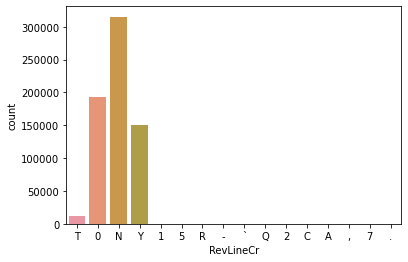

In [14]:
sns.countplot(x ="RevLineCr", data = train)

RevLine Credit features should have been categorical variable with categories Y and N. But it consists a lot of undefined values.

<AxesSubplot:xlabel='LowDoc', ylabel='count'>

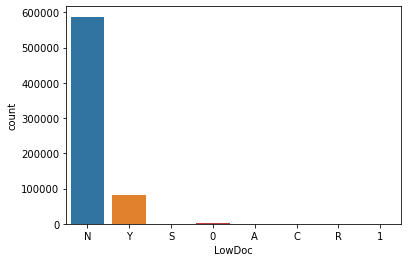

In [15]:
sns.countplot(x ="LowDoc", data = train)

<AxesSubplot:xlabel='LowDoc', ylabel='count'>

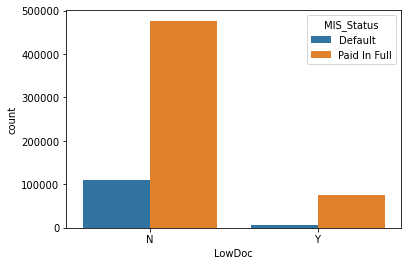

In [16]:
demo = train[["MIS_Status", "LowDoc"]].copy()
demo["MIS_Status"] = demo["MIS_Status"].replace({"P I F": "Paid In Full", "CHGOFF":"Default"})
demo.dropna(inplace=True)
demo = demo[(demo["LowDoc"] == "Y") | (demo["LowDoc"] == "N")]
sns.countplot(x="LowDoc", hue="MIS_Status", data=demo)

#### 6. Amount of Loan

All this five feature explains the amount of loan and its payment balance.

* DisbursementGross : Amount disbursed
* BalanceGross : Gross amount outstanding
* ChgOffPrinGr : Charged-off amount
* GrAppv : Gross amount of loan approved by bank
* SBA_Appv : SBA's guaranteed amount of approved loan

Gross Disbursement can be one of the factor that can be considered as indicator. It indicates the size of loan that might explain the size of the underlying business. Larger the loan, higher the possibility of business being established and expanding, thereby increasing the likelihood of paying of the loan.

The SBA approved amount can be one of the factor to build a model. Along with gross amount of loan approved by the bank, a ratio of SBA guaranteed to Bank approved can be calculated. 

In [17]:
currency_cleaning = lambda x: int(float(x[1:].replace(",", "")))

demo = train[["GrAppv", "SBA_Appv", "MIS_Status", "DisbursementGross"]].copy()
demo["GrAppv"] = demo["GrAppv"].apply(currency_cleaning).astype(int)
demo["SBA_Appv"] = demo["SBA_Appv"].apply(currency_cleaning).astype(int)
demo["DisbursementGross"] = demo["DisbursementGross"].apply(currency_cleaning).astype(int)

demo["Portion"] = demo["SBA_Appv"]/demo["GrAppv"]
demo["MIS_Status"] = demo["MIS_Status"].replace({"P I F": "Paid In Full", "CHGOFF":"Default"})
demo.dropna(inplace=True)
demo.groupby("MIS_Status")["Portion"].describe()

,count,mean,std,min,25%,50%,75%,max
MIS_Status,,,,,,,,
Default,118202.0,0.643908,0.163631,0.12190,0.5,0.50,0.85,1.0
Paid In Full,554698.0,0.723566,0.172580,0.02814,0.5,0.75,0.85,1.0


<AxesSubplot:xlabel='MIS_Status', ylabel='Portion'>

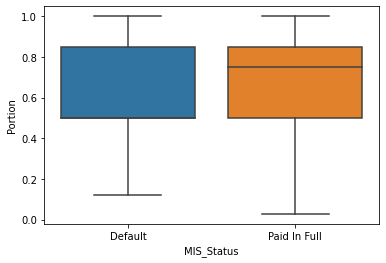

In [18]:
sns.boxplot(x="MIS_Status", y="Portion", data=demo)

In [19]:
demo.groupby("MIS_Status")["DisbursementGross"].describe()


,count,mean,std,min,25%,50%,75%,max
MIS_Status,,,,,,,,
Default,118202.0,132088.424688,211772.251561,4000.0,27037.25,61033.0,140000.0,4362157.0
Paid In Full,554698.0,216458.629126,299790.656027,4000.0,49000.00,100000.0,256000.0,11446325.0


#### 7. New Exist
Explains the business conditions, is it a new or existing business. New and existing businesses have different risks in the business condition. This can be used as feature for modeling.

<AxesSubplot:xlabel='NewExist', ylabel='count'>

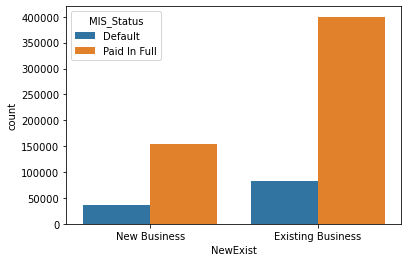

In [20]:
demo = train[["MIS_Status", "NewExist"]].copy()
demo["MIS_Status"] = demo["MIS_Status"].replace({"P I F": "Paid In Full", "CHGOFF":"Default"})
demo["NewExist"] = demo["NewExist"].replace({1.0: "Existing Business", 2.0:"New Business"})
demo.dropna(inplace=True)
sns.countplot(x="NewExist", hue="MIS_Status", data=demo[demo["NewExist"]!= 0])

Features we will be using will are as follows:
1. NewExists
2. DisbursementGross
3. SBA approved portion using GrAppv and SBA_Appv
4. LowDoc
5. Term
6. DisbursementDate to evaluate during the Great Recession

## Data Cleaning

Dropping feature that might never be used

In [21]:

# Drop unused feature
data = train[["DisbursementGross", "DisbursementDate", "Term", "LowDoc", "GrAppv", "SBA_Appv", "NewExist", "MIS_Status", "NAICS"]].copy()

### Null and NaN
From the EDA before, we know that there are some NaN and Null data. Since only a few data with NaN and Null condition, we can drop the data with this condition.

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674373 entries, 811798 to 121958
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DisbursementGross  674373 non-null  object 
 1   DisbursementDate   672654 non-null  object 
 2   Term               674373 non-null  int64  
 3   LowDoc             672426 non-null  object 
 4   GrAppv             674373 non-null  object 
 5   SBA_Appv           674373 non-null  object 
 6   NewExist           674271 non-null  float64
 7   MIS_Status         672900 non-null  object 
 8   NAICS              674373 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 67.6+ MB


In [23]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669299 entries, 811798 to 121958
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DisbursementGross  669299 non-null  object 
 1   DisbursementDate   669299 non-null  object 
 2   Term               669299 non-null  int64  
 3   LowDoc             669299 non-null  object 
 4   GrAppv             669299 non-null  object 
 5   SBA_Appv           669299 non-null  object 
 6   NewExist           669299 non-null  float64
 7   MIS_Status         669299 non-null  object 
 8   NAICS              669299 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 51.1+ MB


### Variable cleaning

#### NAICS
The North American Industry Classification System (NAICS) is the standard used by Federal statistical agencies in classifying business establishments for the purpose of collecting, analyzing, and publishing statistical data related to the U.S. business economy. We need to make sure all samples have six digits NAICS code, so the data that don't have any NAICS code can be drop.

<AxesSubplot:>

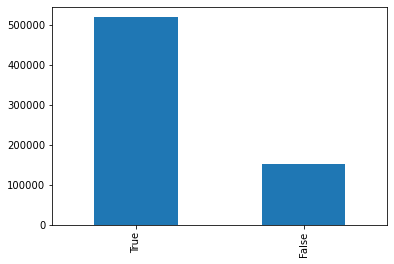

In [24]:
data["NAICS"].map(lambda x: x != 0).value_counts().plot.bar()

In [25]:
# data = data[data.NAICS != 0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669299 entries, 811798 to 121958
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DisbursementGross  669299 non-null  object 
 1   DisbursementDate   669299 non-null  object 
 2   Term               669299 non-null  int64  
 3   LowDoc             669299 non-null  object 
 4   GrAppv             669299 non-null  object 
 5   SBA_Appv           669299 non-null  object 
 6   NewExist           669299 non-null  float64
 7   MIS_Status         669299 non-null  object 
 8   NAICS              669299 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 51.1+ MB


#### NewExist
We can only classify business with new and existing business. Others data with different code can be ignored

<AxesSubplot:>

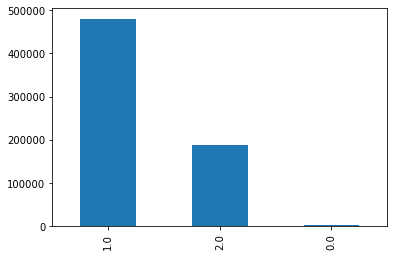

In [26]:
data["NewExist"].value_counts().plot.bar()

In [27]:
data = data[(data.NewExist == 1.0) | (data.NewExist == 2.0)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668538 entries, 811798 to 121958
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DisbursementGross  668538 non-null  object 
 1   DisbursementDate   668538 non-null  object 
 2   Term               668538 non-null  int64  
 3   LowDoc             668538 non-null  object 
 4   GrAppv             668538 non-null  object 
 5   SBA_Appv           668538 non-null  object 
 6   NewExist           668538 non-null  float64
 7   MIS_Status         668538 non-null  object 
 8   NAICS              668538 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 51.0+ MB


#### LowDoc Feature
Since there are only two condition for the LowDoc condition, other data must be drop from dataset.

<AxesSubplot:>

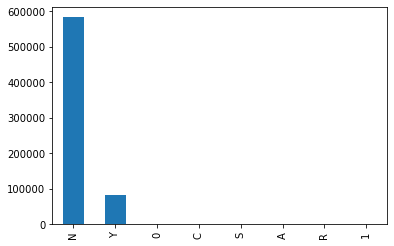

In [28]:
data["LowDoc"].value_counts().plot.bar()

In [29]:
data = data[(data["LowDoc"] == "Y") | (data["LowDoc"] == "N")]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666016 entries, 811798 to 121958
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DisbursementGross  666016 non-null  object 
 1   DisbursementDate   666016 non-null  object 
 2   Term               666016 non-null  int64  
 3   LowDoc             666016 non-null  object 
 4   GrAppv             666016 non-null  object 
 5   SBA_Appv           666016 non-null  object 
 6   NewExist           666016 non-null  float64
 7   MIS_Status         666016 non-null  object 
 8   NAICS              666016 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 50.8+ MB


## Data processing

#### Dummy encoding

MIS_Status field, which is ‘PIF’ if the loan is paid in full and ‘CHGOFF’ if the borrower defaulted (the loan was charged off) is the deciding factor to approve the loan. PIF will be treated as positive class.

In [69]:
outcome_encoder = OneHotEncoder(drop='first')
a = outcome_encoder.fit_transform(data[["MIS_Status"]])
def portion_calculate(mat):
    currency_cleaning = lambda x: int(float(x[1:].replace(",", "")))
    rows, cols = mat.shape
    assert cols == 2  # if we don't have 2 columns, things are unexpected
    
    if hasattr(mat, 'iloc'):
        mat.iloc[:, 0] = mat.iloc[:, 0].apply(currency_cleaning).astype(int)
        mat.iloc[:, 1] = mat.iloc[:, 1].apply(currency_cleaning).astype(int)
        res = mat.iloc[:, 0] / mat.iloc[:, 1]
        return res.to_frame()
    else:
        mat[:, 0] = mat[:, 0].apply(currency_cleaning).astype(int)
        mat[:, 1] = mat[:, 1].apply(currency_cleaning).astype(int)
        res = mat[:, 0] / mat[:, 1]
        return res.reshape((rows, 1))

def clean_currency(mat):
    assert len(mat.shape) == 1
    print
    currency_cleaning = lambda x: int(float(x[1:].replace(",", "")))
    if hasattr(mat, 'iloc'):
        return mat.apply(currency_cleaning).astype(int).to_frame()
    else:
        return mat.apply(currency_cleaning).astype(int).reshape((mat.shape, 1))

sba_portion = FunctionTransformer(portion_calculate)
currency_clean = FunctionTransformer(clean_currency)

disburstmentgross = Pipeline(
    steps=[("clean_data", currency_clean), ("scaler", StandardScaler())]
)


tf_pipe = ColumnTransformer(
    transformers=[
    ('SBA_portion', sba_portion, ['SBA_Appv', 'GrAppv']),
    ('DisbursementGross', disburstmentgross, 'DisbursementGross'),
    ("MIS_Status", OneHotEncoder(drop='first'), ['MIS_Status'])
])


In [70]:
targets = tf_pipe.fit_transform(train)
targets

array([[ 0.5       , -0.42635397,  0.        ,  0.        ],
       [ 1.        ,  0.96135326,  1.        ,  0.        ],
       [ 0.85000392, -0.38854565,  1.        ,  0.        ],
       ...,
       [ 0.9       , -0.52513977,  1.        ,  0.        ],
       [ 0.5       , -0.57723649,  0.        ,  0.        ],
       [ 0.5       ,  1.72795994,  1.        ,  0.        ]])

In [31]:
# approve_loan = pd.get_dummies(data["MIS_Status"], drop_first=True).rename(columns={"P I F": "Approve"})
# data.drop(["MIS_Status"], axis=1, inplace=True)
# data = pd.concat([data,approve_loan], axis=1)

In [32]:
# urban = pd.get_dummies(data["UrbanRural"])
# urban.drop(urban.columns[1], axis=1, inplace=True)
# urban.rename(columns={1: "Urban"}, inplace=True)
# data.drop(["UrbanRural"], axis=1, inplace=True)
# data = pd.concat([data,urban], axis=1)


In [33]:
# rev_line = pd.get_dummies(data["RevLineCr"], drop_first=True).rename(columns={"Y": "RevLine"})
# data.drop(["RevLineCr"], axis=1, inplace=True)
# data = pd.concat([data,rev_line], axis=1)


In [34]:
# low_doc = pd.get_dummies(data["LowDoc"], drop_first=True).rename(columns={"Y": "LowDoc"})
# data.drop(["LowDoc"], axis=1, inplace=True)
# data = pd.concat([data,low_doc], axis=1)


In [35]:
# new = pd.get_dummies(data["NewExist"], drop_first=True).rename(columns={2.0: "New"})
# data.drop(["NewExist"], axis=1, inplace=True)
# data = pd.concat([data,new], axis=1)

#### Real Estate and Recession effect

In [36]:
# realestate = pd.Series(0, index=data.index)
# realestate[data["Term"] >= 240 ] = 1
# data["RealEstate"] = realestate

In [37]:
# rec_date = pd.to_datetime(data["DisbursementDate"]) + pd.to_timedelta(data["Term"]*30, unit="D")
# recession = pd.Series(0, index=data.index)
# recession[(rec_date >= pd.to_datetime("2007-12-01")) & (rec_date <= pd.to_datetime("2009-06-30"))] = 1 
# data.drop(["DisbursementDate"], axis=1, inplace=True)
# data["Recession"] = recession

In [38]:
data

,DisbursementGross,DisbursementDate,Term,LowDoc,GrAppv,SBA_Appv,NewExist,MIS_Status,NAICS
811798,"$78,443.00",31-Mar-05,27,N,"$25,000.00","$12,500.00",2.0,CHGOFF,451110
385253,"$478,000.00",13-Jun-01,240,N,"$478,000.00","$478,000.00",1.0,P I F,452110
246469,"$89,329.00",31-Aug-07,120,N,"$89,329.00","$75,930.00",2.0,P I F,722110
51293,"$150,000.00",31-Aug-05,120,N,"$150,000.00","$75,000.00",1.0,P I F,311330
414383,"$390,000.00",1-Apr-10,108,N,"$390,000.00","$351,000.00",1.0,P I F,326291
...,...,...,...,...,...,...,...,...,...
259178,"$26,432.00",31-Dec-07,84,N,"$3,000.00","$1,500.00",2.0,P I F,531210
365838,"$30,000.00",29-Feb-00,36,N,"$30,000.00","$15,000.00",1.0,P I F,448310
131932,"$50,000.00",31-May-98,12,N,"$50,000.00","$45,000.00",1.0,P I F,0
671155,"$35,000.00",31-Dec-03,49,N,"$35,000.00","$17,500.00",1.0,CHGOFF,812112


#### Loan amount
GrAppv and SBA_Appv can be used to calculate the fraction of loan guaranteed by SBA.

In [39]:
# currency_cleaning = lambda x: int(float(x[1:].replace(",", "")))
# data["GrAppv"] = data["GrAppv"].apply(currency_cleaning).astype(int)
# data["SBA_Appv"] = data["SBA_Appv"].apply(currency_cleaning).astype(int)    
# data["DisbursementGross"] = data["DisbursementGross"].apply(currency_cleaning).astype(int)    

In [40]:
# data["SBA_Guaranteed"] = data["SBA_Appv"]/data["GrAppv"]

In [41]:
# data.drop(["GrAppv", "SBA_Appv"], axis=1, inplace=True)
# data

#### NAICS coding
Because machine learning algorithm use numerical data for considering the model. We need to do feature engineeing to modifiy the feature for modeling.

NAICS

* 11 : Agriculture, forestry, fishing and hunting
* 21 : Mining, quarrying, and oil and gas extraction
* 22 : Utilities
* 23 : Construction
* 31-33 : Manufacturing
* 42 : Wholesale trade
* 44-45 : Retail trade
* 48-49 : Transportation and warehousing
* 51 : Information
* 52 : Finance and insurance
* 53 : Real estate and rental and leasing
* 54 : Professional, scientific, and technical services
* 55 : Management of companies and enterprises
* 56 : Administrative/support & waste management/remediation Service
* 61 : Educational services
* 62 : Health care and social assistance
* 71 : Arts, entertainment, and recreation
* 72 : Accommodation and food services
* 81 : Other services (except public administration)
* 92 : Public administration

In [42]:
# def NAICS_Coding(x):
#     x = str(x)
#     x = x[:2]
#     if (x == '31') | (x == '32') | (x == '33'):
#         x = '31-33'
#     elif (x == '44') | (x == '45'):
#         x = '44-45'
#     elif (x == '48') | (x == '49'):
#         x = '48-49'
#     return x

# data["NAICS"] = data["NAICS"].apply(NAICS_Coding)
# NAICS = pd.get_dummies(data['NAICS'], prefix='NAICS', drop_first=False)
# data = pd.concat([data, NAICS], axis=1)
# data.drop(["NAICS"], axis=1, inplace=True)

In [43]:
data["Approve"].value_counts().plot.bar()   

KeyError: 'Approve'

In [ ]:
def testing_model_features(train_data, feature, outcome):
    from sklearn.inspection import permutation_importance
    train_data, tune_data = train_test_split(train_data, test_size=0.1, random_state=42)
    lg_mod = LogisticRegression(penalty='none', max_iter=1000)
    train_x = train_data[feature]
    train_y = train_data[outcome]
    a = lg_mod.fit(train_x, train_y)
    result = permutation_importance(a, train_x, train_y, n_repeats=10, random_state=0)
    print(result.importances_mean)
    test_x = tune_data[feature]
    test_y = tune_data[outcome]
    train_d = lg_mod.predict(train_x)
    print(f"Training Accuracy: {np.mean(train_d == train_y)}")

    test_d = lg_mod.predict(test_x)
    print(f"Tuning Accuracy: {np.mean(test_d == test_y)}")
    
    tn, fp, fn, tp = confusion_matrix(test_y, test_d).ravel()
    print(confusion_matrix(test_y, test_d))
    print("Accuracy:", (tp+tn)/(tp+tn+fp+fn))
    print("Recall:", tp/(tp+fn))
    print("Precision:", tp/(tp+fp))

In [ ]:
data

In [ ]:
feat_cols = ["New", "Term", "SBA_Guaranteed"]
out_col = 'Approve'
testing_model_features(data, feat_cols, out_col)

In [ ]:
feat_cols = ["Recession", "SBA_Guaranteed", "Term", "New"]
out_col = 'Approve'
testing_model_features(data, feat_cols, out_col)

In [ ]:
feat_cols = ["Recession", "SBA_Guaranteed", "Term", "New", "DisbursementGross"]
out_col = 'Approve'
testing_model_features(data, feat_cols, out_col)

## The model


In [ ]:
def test_acccuracy(train_data, test_data, feature, outcome):
    lg_mod = LogisticRegression(penalty='none', max_iter=1000)
    train_x = train_data[feature]
    train_y = train_data[outcome]
    lg_mod.fit(train_x, train_y)

    test_x = test_data[feature]
    test_y = test_data[outcome]
    train_d = lg_mod.predict(train_x)
    print(f"Training Accuracy: {np.mean(train_d == train_y)}")

    test_d = lg_mod.predict(test_x)
    print(f"Testing Accuracy: {np.mean(test_d == test_y)}")
    
    tn, fp, fn, tp = confusion_matrix(test_y, test_d).ravel()
    print(confusion_matrix(test_y, test_d))
    print("Accuracy:", (tp+tn)/(tp+tn+fp+fn))
    print("Recall:", tp/(tp+fn))
    print("Precision:", tp/(tp+fp))

In [ ]:
# feat_cols = ["New", "Recession", "SBA_Guaranteed", "RealEstate"]
# out_col = 'Approve'
# testing_model_features(train, test, feat_cols, out_col)

In [ ]:
# feat_cols = ["New", "Recession", "SBA_Guaranteed", "RealEstate", "Urban"]
# out_col = 'Approve'
# testing_model_features(train, test, feat_cols, out_col)

In [ ]:
# feat_cols = ["New", "Recession", "SBA_Guaranteed", "RealEstate", "Urban", "RevLine", "LowDoc"]
# out_col = 'Approve'
# testing_model_features(train, test, feat_cols, out_col)

In [ ]:
# feat_cols = [c for c in train.columns if c not in ["Approve"]]
# out_col = 'Approve'
# testing_model_features(train, test, feat_cols, out_col)